In [1]:
#from codecarbon import EmissionsTracker
#try:
#    tracker.stop()  # Intenta detener cualquier instancia previa de codecarbon
##except:
##    pass  # Ignora el error si no hay ninguna instancia activa
# Iniciar el medidor
#tracker = EmissionsTracker()
#tracker.start()

In [2]:
import numpy as np # linear algebra
np.random.seed(10)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Required magic to display matplotlib plots in notebooks
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
data = '/Users/lucia/.cache/kagglehub/datasets/trisha2094/weatheraus/versions/1/weatherAUS.csv'

df = pd.read_csv(data)

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [6]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [8]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [9]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [10]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [11]:
y = df["RainTomorrow"]  # Variable objetivo
X = df.drop(columns=["RainTomorrow"])  # Resto de variables como features

# Mostrar las dimensiones para verificar
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (142193, 25)
Shape of y: (142193,)


In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [13]:
X_train.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'Year', 'Month', 'Day'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Identificar columnas categóricas
categorical_features = X_train.select_dtypes(include=['object', 'category'])

# Identificar columnas numéricas
numerical_features = X_train.select_dtypes(include=['number'])

# Convertir las categóricas en valores numéricos
categorical_encoded = categorical_features.apply(lambda col: LabelEncoder().fit_transform(col))

# Unir columnas numéricas y categóricas codificadas
features = np.hstack((numerical_features.to_numpy(), categorical_encoded.to_numpy()))

# Labels (y_train ya es la variable objetivo)
labels = y_train.to_numpy()

In [15]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# 1. Verificar tipo de labels antes de buscar NaN
print(f"Tipo de labels: {labels.dtype}")

# Si labels es un array NumPy de tipo float, usamos np.isnan()
if np.issubdtype(labels.dtype, np.number):
    print(f"NaN en labels: {np.isnan(labels).sum()}")
else:
    # Si labels no es numérico, convertirlo a pandas.Series y usar .isna()
    labels_series = pd.Series(labels)
    print(f"NaN en labels: {labels_series.isna().sum()}")

# 2. Eliminar filas donde labels tenga NaN
mask = pd.Series(labels).notna()
features = features[mask]
labels = labels[mask]

# 3. Imputar NaN en features
num_cols = numerical_features.columns
cat_cols = categorical_features.columns

# Imputar numéricas con la media
num_imputer = SimpleImputer(strategy='mean')
features[:, :len(num_cols)] = num_imputer.fit_transform(features[:, :len(num_cols)])

# Imputar categóricas con el modo
cat_imputer = SimpleImputer(strategy='most_frequent')
features[:, len(num_cols):] = cat_imputer.fit_transform(features[:, len(num_cols):])

# Verificar que ya no haya NaN en features
print(f"NaN en features después de la imputación:\n{np.isnan(features).sum(axis=0)}")


Tipo de labels: object
NaN en labels: 0
NaN en features después de la imputación:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


PERCEPTRON

In [16]:
# Define the sigmoid activator; we ask if we want the sigmoid or its derivative
def sigmoid_act(x, der=False):
    import numpy as np
    
    if (der==True) : #derivative of the sigmoid
        f = x/(1-x)
    else : # sigmoid
        f = 1/(1+ np.exp(-x))
    
    return f


In [17]:
# We may employ the Rectifier Linear Unit (ReLU)
def ReLU_act(x, der=False):
    import numpy as np
    
    if (der== True):
        if x>0 :
            f= 1
        else :
            f = 0
    else :
        if x>0:
            f = x
        else :
            f = 0
    return f

In [19]:

# Now we are ready to define the perceptron; 
# it eats a np.array (that may be a list of features )
def perceptron(X, act='Sigmoid'): 
    import numpy as np
    
    shapes = X.shape # Pick the number of (rows, columns)!
    n= shapes[0]+shapes[1]
    # Generating random weights and bias
    w = 2*np.random.random(shapes) - 0.5 # We want w to be between -1 and 1
    b = np.random.random(1)
    
    # Initialize the function
    f = b[0]
    for i in range(0, X.shape[0]-1) : # run over column elements
        for j in range(0, X.shape[1]-1) : # run over rows elements
            f += w[i, j]*X[i,j]/n
    # Pass it to the activation function and return it as an output
    if act == 'Sigmoid':
        output = sigmoid_act(f)
    else :
        output = ReLU_act(f)
        
    return output

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [21]:
print('Output with sigmoid activator: ', perceptron(features_scaled))
print('Output with ReLU activator: ', perceptron(features_scaled))

Output with sigmoid activator:  0.5231442366384295
Output with ReLU activator:  0.682468666530021


PERCEPTRÓN MULTICAPA

In [22]:
import numpy as np

# Define the sigmoid activator; we ask if we want the sigmoid or its derivative
def sigmoid_act(x, der=False):
    import numpy as np
    
    if (der==True) : #derivative of the sigmoid
        f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
    else : # sigmoid
        f = 1/(1+ np.exp(- x))
    
    return f

# We may employ the Rectifier Linear Unit (ReLU)
def ReLU_act(x, der=False):
    import numpy as np
    
    if (der == True): # the derivative of the ReLU is the Heaviside Theta
        f = np.heaviside(x, 1)
    else :
        f = np.maximum(x, 0)
    
    return f

In [23]:
# split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.30)

print('Training records:',Y_train.size)
print('Test records:',Y_test.size)

Training records: 79627
Test records: 34127


In [24]:
from imblearn.over_sampling import SMOTE

#Aplicar SMOTE para balancear los datos
smote = SMOTE(random_state=42)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)

# Verificar la nueva distribución
print("Nueva distribución de clases en Y_train:")
print(pd.Series(Y_train_balanced).value_counts())

X_train = X_train_balanced
Y_train = Y_train_balanced

Nueva distribución de clases en Y_train:
Yes    61645
No     61645
dtype: int64


In [25]:
from sklearn.preprocessing import LabelEncoder

# Convertir 'Yes' -> 1 y 'No' -> 0
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.transform(Y_test)  # También convertir Y_test si lo necesitas


/var/folders/6p/rj62j_kn3_z770jd73t206640000gn/T/ipykernel_95829/3998926874.py:10: RuntimeWarning: overflow encountered in exp
  f = 1/(1+ np.exp(- x))


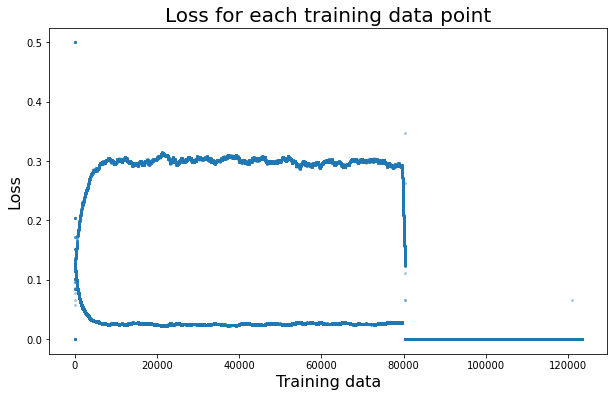

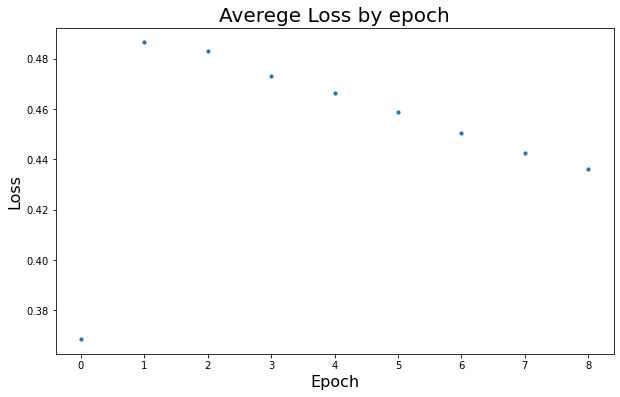

In [26]:
# Set up the number of perceptron per each layer:
p=4 # Layer 1
q=4 # Layer 2

# Set up the Learning rate
eta =  1/623


# 0: Random initialize the relevant data (weights and bias)
w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
b1 = np.random.rand(p)

w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
b2 = np.random.rand(q)

wOut = 2*np.random.rand(q) - 0.5  # Output Layer
bOut = np.random.rand(1)

mu = []
vec_y = []

# Start looping over the passengers, i.e. over I.

for I in range(0, X_train.shape[0]): #loop in all the passengers:
    
    # 1: input the data 
    x = X_train[I]
    
    
    # 2: Start the algorithm
    
    # 2.1: Feed forward
    z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
    z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
    y = sigmoid_act(np.dot(wOut, z2) + bOut) # Output of the Output layer
    
    #2.2: Compute the output layer's error
    delta_Out =  (y-Y_train[I]) * sigmoid_act(y, der=True)
    
    #2.3: Backpropagate
    delta_2 = delta_Out * wOut * ReLU_act(z2, der=True) # Second Layer Error
    delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True) # First Layer Error
    
    # 3: Gradient descent (updating bias and weights)
    wOut = wOut - eta*delta_Out*z2  # Outer Layer
    bOut = bOut - eta*delta_Out
    
    w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
    b2 = b2 - eta*delta_2
    
    w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0]) # Hidden Layer 1
    b1 = b1 - eta*delta_1
    
    # 4. Computation of the loss function. Esta es la pérdida cuadrática media para medir la diferencia entre predicción y realidad.
    mu.append((1/2)*(y-Y_train[I])**2)
    vec_y.append(y[0])


# Plotting the Cost function for each training data     
plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, X_train.shape[0]), mu, alpha=0.3, s=4, label='mu')
plt.title('Loss for each training data point', fontsize=20)
plt.xlabel('Training data', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

# Plotting the average cost function over 10 training data    
pino = []
for i in range(0, 9):
    pippo = 0
    for m in range(0, 59):
        pippo+=vec_y[60*i+m]/60
    pino.append(pippo)
    
    

plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, 9), pino, alpha=1, s=10, label='error')
plt.title('Averege Loss by epoch', fontsize=20)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

ANN

In [27]:
def ANN_train(X_train, Y_train, p=4, q=4, eta=0.0015):
    import numpy as np
    import matplotlib.pyplot as plt
    
    # 0: Random initialize the relevant data 
    w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
    b1 = np.random.rand(p)

    w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
    b2 = np.random.rand(q)

    wOut = 2*np.random.rand(q) - 0.5   # Output Layer
    bOut = np.random.rand(1)

    mu = []
    vec_y = []

    # Start looping over the passengers, i.e. over I.

    for I in range(0, X_train.shape[0]-1): #loop in all the passengers:
    
        # 1: input the data 
        x = X_train[I]
    
        # 2: Start the algorithm
    
        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut) # Output of the Output layer
    
        #2.2: Compute the output layer's error
        delta_Out = 2 * (y-Y_train[I]) * sigmoid_act(y, der=True)
    
        #2.3: Backpropagate
        delta_2 = delta_Out * wOut * ReLU_act(z2, der=True) # Second Layer Error
        delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True) # First Layer Error
    
        # 3: Gradient descent 
        wOut = wOut - eta*delta_Out*z2  # Outer Layer
        bOut = bOut - eta*delta_Out
    
        w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
        b2 = b2 -  eta*delta_2
    
        w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0])
        b1 = b1 - eta*delta_1
    
        # 4. Computation of the loss function
        mu.append((y-Y_train[I])**2)
        vec_y.append(y)
    
    batch_loss = []
    for i in range(0, 10):
        loss_avg = 0
        for m in range(0, 60):
            loss_avg+=vec_y[60*i+m]/60
        batch_loss.append(loss_avg)

    
    
    plt.figure(figsize=(10,6))
    plt.scatter(range(1, len(batch_loss) + 1), batch_loss, alpha=1, s=100, label='Loss', color='red')  # Aumentamos el tamaño y cambiamos color
    plt.title('Average Loss by Epoch', fontsize=20)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.xticks(range(1, len(batch_loss) + 1))  # Asegurar que el eje X muestra los valores correctamente
    plt.ylim(min(batch_loss) * 0.9, max(batch_loss) * 1.1)  # Ajustar el rango del eje Y
    plt.grid(True)  # Agregar cuadrícula para mejor visibilidad
    plt.legend()  # Agregar leyenda para claridad
    plt.show()

    
    return w1, b1, w2, b2, wOut, bOut, mu

In [28]:
print("Contenido de pino:", pino)
print("Longitud de pino:", len(pino))


Contenido de pino: [0.368662918785496, 0.4863954625155923, 0.4829608706924101, 0.472982843423254, 0.4661318228491865, 0.4589844069641164, 0.4504437999022355, 0.44242263625101796, 0.4361884614565481]
Longitud de pino: 9


/var/folders/6p/rj62j_kn3_z770jd73t206640000gn/T/ipykernel_95829/3998926874.py:10: RuntimeWarning: overflow encountered in exp
  f = 1/(1+ np.exp(- x))
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/numpy/core/numeric.py:936: RuntimeWarning: overflow encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)


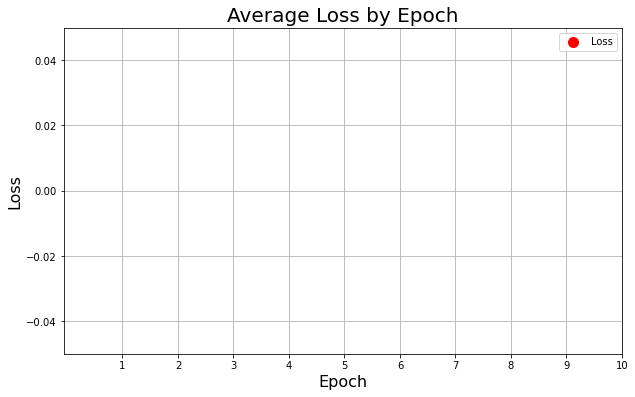

In [29]:
w1, b1, w2, b2, wOut, bOut, mu = ANN_train(X_train, Y_train, p=8, q=4, eta=0.0015)


PREDICCIONES

In [30]:
def ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu):
    import numpy as np
    
    pred = []
    
    for I in range(0, X_test.shape[0]): #loop in all the passengers
        # 1: input the data 
        x = X_test[I]
        
        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut)  # Output of the Output layer
        
        # Append the prediction;
        # We now need a binary classifier; we this apply an Heaviside Theta and we set to 0.5 the threshold
        # if y < 0.5 the output is zero, otherwise is 1
        pred.append( np.heaviside(y - 0.5, 1)[0] )
    
    
    return np.array(pred);



In [31]:
predictions = ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu)

EVALUACIÓN

In [31]:
Y_test

array([0, 0, 0, ..., 0, 1, 0])

In [33]:
predictions

array([nan, nan, nan, ..., nan, nan, nan])

In [ ]:

# Detener el medidor y obtener los resultados
#tracker.stop()